# How to minimize cost in Linear Regression Model

We will define a cost function in a simple linear regression model and minimize the cost value.

## Hypothesis

$$
H(x) = Wx
$$

For simplicity, we will assume hypothesis with zero intercept.


## Cost

$$
cost(W) = {1 \over m} {\sum_{i=1}^m} (Wx_i-y_i)^2
$$

The cost function is defined as the mean of the squared difference between the hypothesis and the y-values.

## Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow Version: %s" % (tf.__version__))

TensorFlow Version: 2.0.0


## Data

In [2]:
X = np.array([1,2,3,4,5])
Y = np.array([1,2,3,4,5])

## Defining cost function with numpy

In [3]:
def cost_func(W, X, Y):
    err = 0
    for i in range(len(X)):
        err += (W*X[i]-Y[i])**2
    cost = err / len(X)
    return cost

Let's make 100 intervals between -2 and 4, and look at the cost changes with these weights.

In [4]:
cost_list = []
x_range = np.linspace(-2, 4, num=100)
for feed_W in x_range:
    
    curr_cost = cost_func(feed_W, X, Y)
    cost_list.append(curr_cost)
    
    if len(cost_list) % 20 == 0:
        print("W: %s \nCost: %s \n" % (feed_W, curr_cost))

W: -0.8484848484848484 
Cost: 37.58585858585859 

W: 0.36363636363636376 
Cost: 4.454545454545453 

W: 1.5757575757575757 
Cost: 3.646464646464646 

W: 2.787878787878788 
Cost: 35.161616161616166 

W: 4.0 
Cost: 99.0 



Among the weights set above, when the weight is about 1, the cost is the smallest as 0.

In [5]:
minimum_index = cost_list.index(min(cost_list))
optimal_W = x_range[minimum_index]
optimal_cost = cost_list[minimum_index]

print("Optimal W: %s" % optimal_W)
print("Optimal Cost: %s" % optimal_cost)

Optimal W: 0.9696969696969697
Optimal Cost: 0.010101010101010083


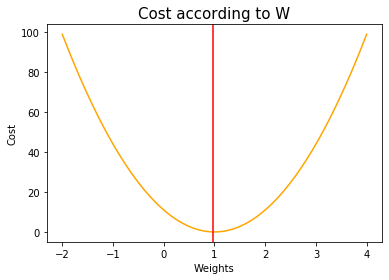

In [6]:
plt.title('Cost according to W', size=15)
plt.plot(x_range, cost_list, color='orange')
plt.axvline(x=optimal_W, color='red')
plt.xlabel('Weights')
plt.ylabel('Cost')
plt.show()

## How to define Cost Function in TensorFlow 2.0

Now let's minimize the cost with TensorFlow.

In [7]:
X = np.array([1,2,3,4,5])
Y = np.array([1,2,3,4,5])

In [8]:
def cost_func(W, X, Y):
    
    hypothesis = W*X
    cost = tf.reduce_mean(tf.square(hypothesis-Y))
    
    return cost

In [9]:
cost_list = []
x_range = np.linspace(-2, 4, num=100)
for feed_W in x_range:
    
    curr_cost = cost_func(feed_W, X, Y)
    cost_list.append(curr_cost)
    
    if len(cost_list) % 20 == 0:
        print("W: %s \nCost: %s \n" % (feed_W, curr_cost))

W: -0.8484848484848484 
Cost: tf.Tensor(37.58585858585859, shape=(), dtype=float64) 

W: 0.36363636363636376 
Cost: tf.Tensor(4.454545454545453, shape=(), dtype=float64) 

W: 1.5757575757575757 
Cost: tf.Tensor(3.646464646464646, shape=(), dtype=float64) 

W: 2.787878787878788 
Cost: tf.Tensor(35.161616161616166, shape=(), dtype=float64) 

W: 4.0 
Cost: tf.Tensor(99.0, shape=(), dtype=float64) 



In [10]:
minimum_index = cost_list.index(min(cost_list))
optimal_W = x_range[minimum_index]
optimal_cost = cost_list[minimum_index]

print("Optimal W: %s" % optimal_W)
print("Optimal Cost: %s" % optimal_cost.numpy())

Optimal W: 0.9696969696969697
Optimal Cost: 0.010101010101010083


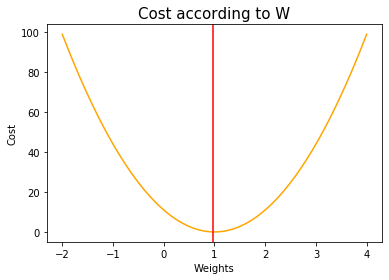

In [11]:
plt.title('Cost according to W', size=15)
plt.plot(x_range, cost_list, color='orange')
plt.axvline(x=optimal_W, color='red')
plt.xlabel('Weights')
plt.ylabel('Cost')
plt.show()

## Gradient Descent

$$
cost(W) = {1 \over m} {\sum_{i=1}^m} (Wx_i-y_i)^2
$$

$$
W:=W-\alpha{1\over m} {\sum_{i=1}^m} (Wx_i-y_i) x_i
$$

```python
alpha = 0.01
gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
descent = W - tf.multiply(alpha, gradient)
W.assign(descent)
```

Use the derivative of the Cost function for W to update Weights.

In [12]:
tf.random.set_seed(2020)

x_data = [1,2,3,4,5]
y_data = [1,3,5,7,9]

W = tf.Variable(tf.random.normal([1], mean=0.0))

for step in range(300):
    
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis-Y))
    
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 50 == 0:
        print("#%s \t W: %s \t Cost: %s" % (step, W.numpy(), cost.numpy()))

#0 	 W: [0.02011158] 	 Cost: 13.3341675
#50 	 W: [0.99711144] 	 Cost: 0.00011587101
#100 	 W: [0.99999154] 	 Cost: 1.0004442e-09
#150 	 W: [0.99999976] 	 Cost: 5.2295944e-13
#200 	 W: [0.99999976] 	 Cost: 5.2295944e-13
#250 	 W: [0.99999976] 	 Cost: 5.2295944e-13
